In [61]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import scikit_posthocs as sp
import scipy.stats as stats

### Traitement avant de répondre à la premiere question

In [42]:
# Chargement du DataSet
df = pd.read_excel("Business_Case.xlsx")

In [43]:
# Affichage des premieres lignes du Dataset
df.head()

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune


In [44]:
# Filtrer les lignes du DataFrame 'df' où la colonne 'open_at' est inférieure à 'acquired_at'
df_filtre = df[df['open_at'] < df['acquired_at']]

# Afficher les 5 premières lignes du DataFrame filtré pour vérifier le résultat
df_filtre.head()

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
3979,54f04667-290e-4039-a97f-226cebb98787,android,2020-02-05 15:50:56.272000,82fe2240-63b4-4421-8989-4c38bfacee31,DE,784,783,92,1,0.000065,9,0,0,0,2020-02-05 15:51:25.014000,android_new_users,ab-test_android,xxLow
33130,67c1e938-e7dc-43dc-9a76-affd3748d3c2,android,2020-02-05 15:48:03.700000,f3576d7a-8dde-4faa-8b67-0415458ba524,NL,788,783,225,1,0.009453,3,0,2,0,2020-02-05 15:48:25.844000,android_new_users,ab-test_android,xHigh
205315,0a5152fe-51bb-44d3-824f-6355525c2dcc,android,2020-02-12 23:07:31.330000,d1a1c608-14c4-4c43-8c3c-4d5a0cb6e8bc,US,785,783,0,1,0.000000,0,0,1,1,2020-02-12 23:07:31.399000,android_new_users,ab-test_android,xLow


In [45]:
# Créer un nouveau dataset où 'open_at' est supérieur ou égal à 'acquired_at'
new_df = df[df['open_at'] >= df['acquired_at']].copy()

# Afficher les 10 premières lignes du nouveau dataset
new_df.head()

,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune


In [46]:
# Informations générales sur le dataset
print("\nInformations sur le dataset :")
new_df.info()


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
Index: 372831 entries, 0 to 372833
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   session_id          372831 non-null  object 
 1   platform            372831 non-null  object 
 2   open_at             372831 non-null  object 
 3   user_id             372831 non-null  object 
 4   country             372829 non-null  object 
 5   ab_cohort_id        372831 non-null  int64  
 6   segment_id          372831 non-null  int64  
 7   session_length      372831 non-null  int64  
 8   session_number_     372831 non-null  int64  
 9   publisher_revenue   372831 non-null  float64
 10  fs_shown            372831 non-null  int64  
 11  rv_shown            372831 non-null  int64  
 12  game_count          372831 non-null  int64  
 13  offline_game_count  372831 non-null  int64  
 14  acquired_at         372831 non-null  object 
 15  segment_

In [47]:
# Convertir les colonnes de dates en format datetime
new_df['open_at'] = pd.to_datetime(new_df['open_at'])
new_df['acquired_at'] = pd.to_datetime(new_df['acquired_at'])

# Vérification des types de données après transformation
print("\nTypes de données après transformation des dates :")
print(new_df.info())


Types de données après transformation des dates :
<class 'pandas.core.frame.DataFrame'>
Index: 372831 entries, 0 to 372833
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   session_id          372831 non-null  object        
 1   platform            372831 non-null  object        
 2   open_at             372831 non-null  datetime64[ns]
 3   user_id             372831 non-null  object        
 4   country             372829 non-null  object        
 5   ab_cohort_id        372831 non-null  int64         
 6   segment_id          372831 non-null  int64         
 7   session_length      372831 non-null  int64         
 8   session_number_     372831 non-null  int64         
 9   publisher_revenue   372831 non-null  float64       
 10  fs_shown            372831 non-null  int64         
 11  rv_shown            372831 non-null  int64         
 12  game_count          372831 non-null  int

In [48]:
# Vérifier le nombre de valeurs manquantes pour chaque colonne
print("Valeurs manquantes par colonne :")
print(new_df.isnull().sum())

Valeurs manquantes par colonne :
session_id            0
platform              0
open_at               0
user_id               0
country               2
ab_cohort_id          0
segment_id            0
session_length        0
session_number_       0
publisher_revenue     0
fs_shown              0
rv_shown              0
game_count            0
offline_game_count    0
acquired_at           0
segment_name          0
ab_name               0
ab_cohort_name        0
dtype: int64


In [49]:
# Remplacer les valeurs manquantes dans 'country' par 'Unknown'
new_df['country'] = new_df['country'].fillna('Unknown')

# Vérification des valeurs manquantes après traitement
print("Valeurs manquantes après traitement :")
print(new_df.isnull().sum())

Valeurs manquantes après traitement :
session_id            0
platform              0
open_at               0
user_id               0
country               0
ab_cohort_id          0
segment_id            0
session_length        0
session_number_       0
publisher_revenue     0
fs_shown              0
rv_shown              0
game_count            0
offline_game_count    0
acquired_at           0
segment_name          0
ab_name               0
ab_cohort_name        0
dtype: int64


In [50]:
# Répartition des cohortes de test A/B
cohort_counts = new_df['ab_cohort_name'].value_counts()
print("\nRépartition des cohortes de test A/B :")
print(cohort_counts)


Répartition des cohortes de test A/B :
ab_cohort_name
control     62952
xxLow       62838
xLow        62516
xHigh       62102
gameTune    61238
xxHigh      61185
Name: count, dtype: int64


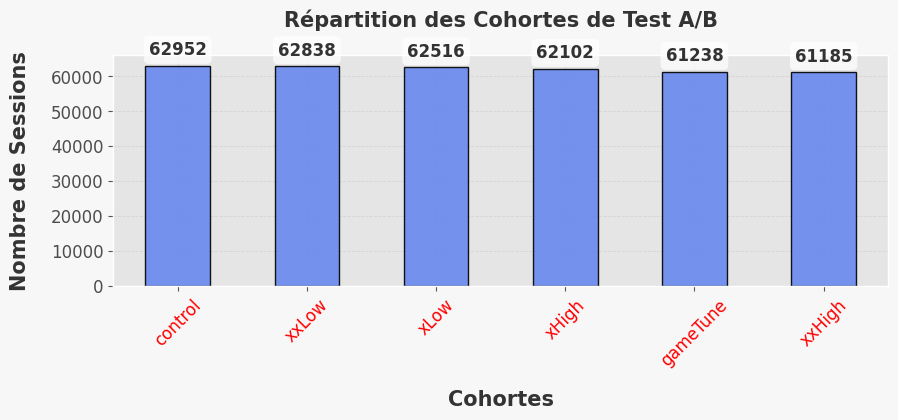

In [51]:
plt.style.use('ggplot')
sns.set_palette("coolwarm")

fig, ax = plt.subplots(figsize=(10, 3), facecolor='#f7f7f7')

bars = cohort_counts.plot(kind='bar', alpha=0.9, edgecolor='black', linewidth=1, ax=ax)

plt.title('Répartition des Cohortes de Test A/B', fontsize=15, fontweight='bold', color='#333333', pad=20)
plt.xlabel('Cohortes', fontsize=15, fontweight='bold', color='#333333', labelpad=15)
plt.ylabel('Nombre de Sessions', fontsize=15, fontweight='bold', color='#333333', labelpad=15)

plt.xticks(rotation=45, fontsize=12, color='red')
plt.yticks(fontsize=12, color='#4d4d4d')

ax.grid(True, which='major', linestyle='--', linewidth=0.6, color='#cccccc', alpha=0.7)

for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, color='#333333', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.show()

### 1 - Décrivons brièvement la donnée et le context du test A/B

**Contexte :**
Le jeu mobile a mis en place une expérience A/B testing pour évaluer l'impact de différentes fréquences d'affichage de publicités sur l'engagement des utilisateurs et les revenus générés. Le test A/B vise à identifier la fréquence optimale d'affichage de publicités parmi plusieurs groupes (xxLow, xxHigh, etc.), en analysant l'effet de ces publicités sur des variables clés comme la durée des sessions, les revenus générés et l'expérience globale des utilisateurs.

**Types de publicités :**
Les publicités affichées dans le jeu sont de deux types :

FS (Full Screen ads) : Publicités affichées entre les niveaux ou les parties du jeu. Elles sont souvent perçues comme plus intrusives.
RV (Rewarded Video ads) : Publicités regardées volontairement par les joueurs pour obtenir une récompense en jeu. Ces publicités sont généralement mieux acceptées, car elles offrent une contrepartie.

**Types de Données :**
Le dataset contient des informations sur des sessions de jeu pour des utilisateurs répartis en différentes cohortes. Les variables suivantes sont importantes pour cette analyse :

**session_id **: Identifiant unique de la session.
**platform** : Plateforme de l'utilisateur (Android, iOS).
**open_at** : Horodatage de la session.
**user_id **: Identifiant de l'utilisateur.
**country **: Pays d'origine de l'utilisateur.
**session_length** : Durée de la session (en minutes).
**publisher_revenue** : Revenus générés par les publicités lors de la session.
**fs_shown** : Nombre de publicités plein écran affichées durant la session.
**rv_shown** : Nombre de publicités récompensées visionnées par les utilisateurs durant la session.
**ab_cohort_name** : Nom de la cohorte A/B (xxLow, xxHigh, etc.) à laquelle la session est assignée.


**Objectif du test A/B :**

L'objectif du test est d'évaluer l'impact des différentes fréquences d'affichage de publicités sur :

La durée des sessions et le nombre de session (pour mesurer l'engagement utilisateur).
Les revenus générés (via publicités ou autres sources de monétisation). 

Le test cherche à équilibrer la monétisation (revenus générés) et l'engagement utilisateur (via la durée des sessions) tout en prenant en compte l'impact des différents formats de publicité.

### Traitement avant de répondre à la premiere question

## Étape 1 : Identification des Métriques Clés

Les deux principales dimensions à analyser dans ce jeu de données sont :

### Durée de session (session_length).
### Revenu par session (publisher_revenue).
### Nombre de sessions par utilisateur (session_number_).

Ces trois métriques sont cruciales, car elles reflètent directement l'engagement de l'utilisateur et la performance financière de la plateforme.

En plus de ces trois métriques, d'autres variables peuvent jouer un rôle important dans leur variation :

### fs_shown : Nombre de publicités plein écran affichées.
### rv_shown : Nombre de vidéos récompensées affichées.

Ces dernières sont des variables d'action qui pourraient avoir un impact direct sur le revenu et la durée des sessions.

# Identification et traitement des valeurs aberrantes :


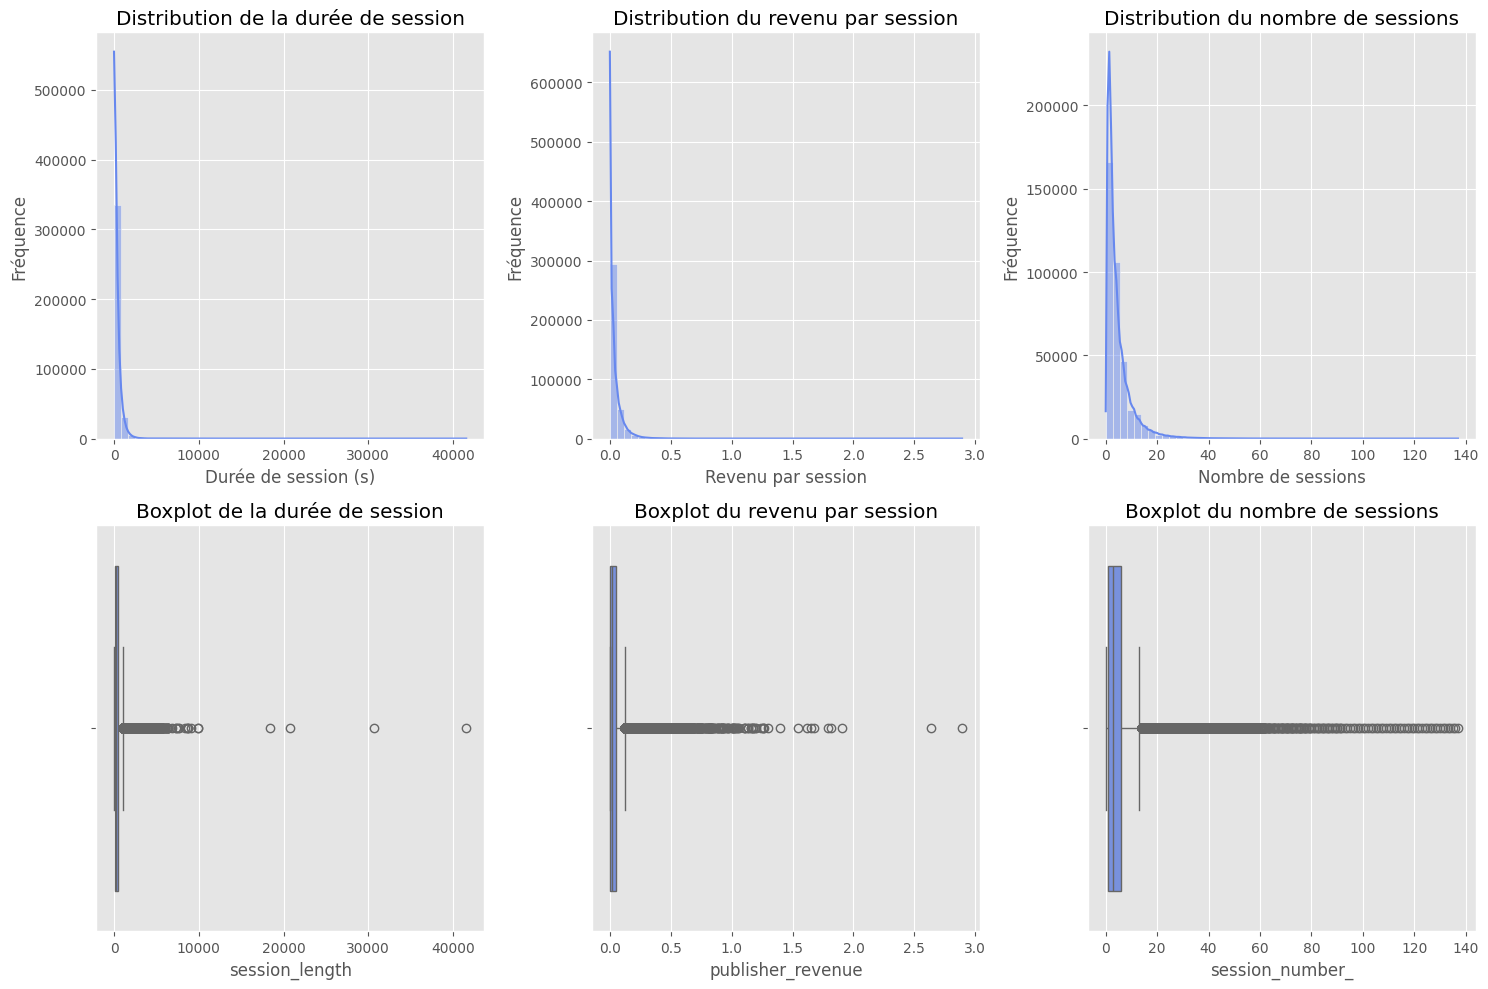

In [52]:
# Taille de la figure
plt.figure(figsize=(15, 10))

# Histogramme de la durée de session
plt.subplot(2, 3, 1)
sns.histplot(new_df['session_length'], bins=50, kde=True)
plt.title('Distribution de la durée de session')
plt.xlabel('Durée de session (s)')
plt.ylabel('Fréquence')

# Boxplot de la durée de session
plt.subplot(2, 3, 4)
sns.boxplot(x=new_df['session_length'])
plt.title('Boxplot de la durée de session')

# Histogramme du revenu par session
plt.subplot(2, 3, 2)
sns.histplot(new_df['publisher_revenue'], bins=50, kde=True)
plt.title('Distribution du revenu par session')
plt.xlabel('Revenu par session')
plt.ylabel('Fréquence')

# Boxplot du revenu par session
plt.subplot(2, 3, 5)
sns.boxplot(x=new_df['publisher_revenue'])
plt.title('Boxplot du revenu par session')

# Histogramme du nombre de sessions
plt.subplot(2, 3, 3)
sns.histplot(new_df['session_number_'], bins=50, kde=True)
plt.title('Distribution du nombre de sessions')
plt.xlabel('Nombre de sessions')
plt.ylabel('Fréquence')

# Boxplot du nombre de sessions
plt.subplot(2, 3, 6)
sns.boxplot(x=new_df['session_number_'])
plt.title('Boxplot du nombre de sessions')

plt.tight_layout()
plt.show()


In [53]:
# Filtrer les valeurs aberrantes de la durée de session
filtered_df = new_df[(new_df['session_length'] >= 10) & (new_df['session_length'] <= 10000)]

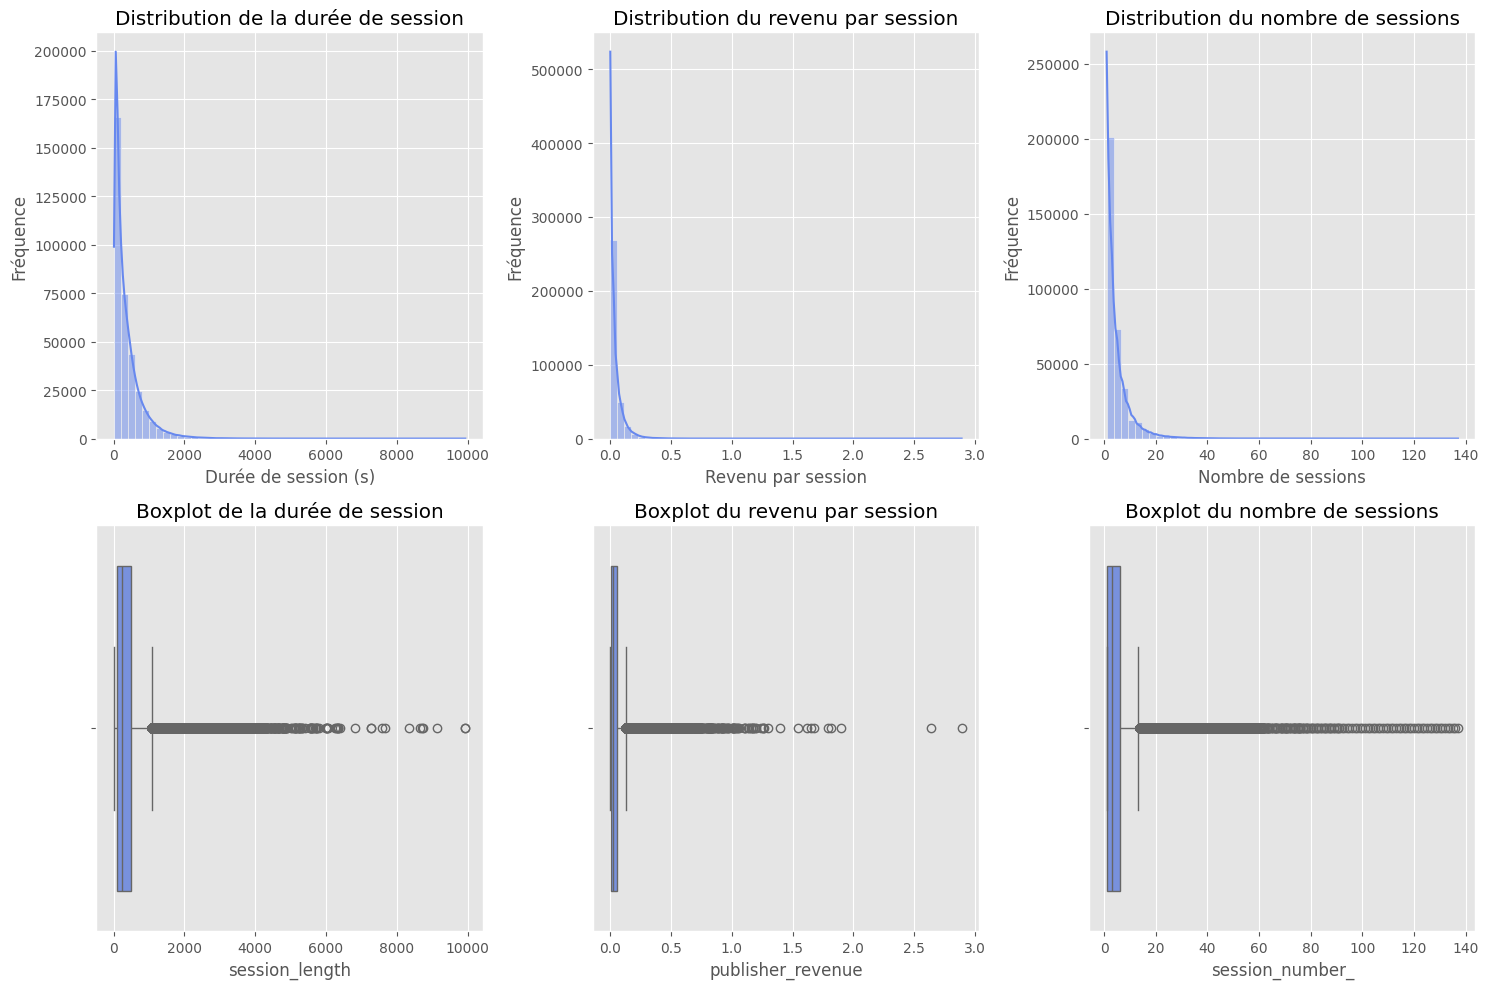

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille de la figure
plt.figure(figsize=(15, 10))

# Histogramme de la durée de session
plt.subplot(2, 3, 1)
sns.histplot(filtered_df['session_length'], bins=50, kde=True)
plt.title('Distribution de la durée de session')
plt.xlabel('Durée de session (s)')
plt.ylabel('Fréquence')

# Boxplot de la durée de session
plt.subplot(2, 3, 4)
sns.boxplot(x=filtered_df['session_length'])
plt.title('Boxplot de la durée de session')

# Histogramme du revenu par session
plt.subplot(2, 3, 2)
sns.histplot(filtered_df['publisher_revenue'], bins=50, kde=True)
plt.title('Distribution du revenu par session')
plt.xlabel('Revenu par session')
plt.ylabel('Fréquence')

# Boxplot du revenu par session
plt.subplot(2, 3, 5)
sns.boxplot(x=filtered_df['publisher_revenue'])
plt.title('Boxplot du revenu par session')

# Histogramme du nombre de sessions
plt.subplot(2, 3, 3)
sns.histplot(filtered_df['session_number_'], bins=50, kde=True)
plt.title('Distribution du nombre de sessions')
plt.xlabel('Nombre de sessions')
plt.ylabel('Fréquence')

# Boxplot du nombre de sessions
plt.subplot(2, 3, 6)
sns.boxplot(x=filtered_df['session_number_'])
plt.title('Boxplot du nombre de sessions')

plt.tight_layout()
plt.show()

# Analyse statistique des métriques
- Test de Kruskal-Wallis pour chaque métrique : 
Le test de Kruskal-Wallis permet de vérifier s'il existe des différences significatives entre les groupes pour une métrique donnée. Si la p-value est inférieure à 0,05, cela indique qu'il y a des différences significatives entre les groupes.

In [55]:
# Création de groupes pour chaque cohorte pour chaque métrique
session_length_groups = [filtered_df[filtered_df['ab_cohort_name'] == cohort]['session_length'] 
                         for cohort in filtered_df['ab_cohort_name'].unique()]
publisher_revenue_groups = [filtered_df[filtered_df['ab_cohort_name'] == cohort]['publisher_revenue'] 
                            for cohort in filtered_df['ab_cohort_name'].unique()]
session_number_groups = [filtered_df[filtered_df['ab_cohort_name'] == cohort]['session_number_'] 
                         for cohort in filtered_df['ab_cohort_name'].unique()]

# 1. Test de Kruskal-Wallis pour la durée de session
kruskal_stat_length, kruskal_p_length = kruskal(*session_length_groups)
print("\nTest de Kruskal-Wallis - Durée de session :")
print(f"Statistique : {kruskal_stat_length}, p-value : {kruskal_p_length}")

if kruskal_p_length < 0.05:
    print("Il existe des différences significatives entre les cohortes pour la durée des sessions.")
    dunn_results_length = sp.posthoc_dunn(filtered_df, val_col='session_length', group_col='ab_cohort_name', p_adjust='bonferroni')
    print("\nRésultats du test post-hoc de Dunn (valeurs p) - Durée de session :")
    print(dunn_results_length)
else:
    print("Aucune différence significative détectée entre les cohortes pour la durée des sessions.")

# 2. Test de Kruskal-Wallis pour le revenu par session
kruskal_stat_revenue, kruskal_p_revenue = kruskal(*publisher_revenue_groups)
print("\nTest de Kruskal-Wallis - Revenu par session :")
print(f"Statistique : {kruskal_stat_revenue}, p-value : {kruskal_p_revenue}")

if kruskal_p_revenue < 0.05:
    print("Il existe des différences significatives entre les cohortes pour le revenu par session.")
    dunn_results_revenue = sp.posthoc_dunn(filtered_df, val_col='publisher_revenue', group_col='ab_cohort_name', p_adjust='bonferroni')
    print("\nRésultats du test post-hoc de Dunn (valeurs p) - Revenu par session :")
    print(dunn_results_revenue)
else:
    print("Aucune différence significative détectée entre les cohortes pour le revenu par session.")

# 3. Test de Kruskal-Wallis pour le nombre de sessions
kruskal_stat_number, kruskal_p_number = kruskal(*session_number_groups)
print("\nTest de Kruskal-Wallis - Nombre de sessions :")
print(f"Statistique : {kruskal_stat_number}, p-value : {kruskal_p_number}")

if kruskal_p_number < 0.05:
    print("Il existe des différences significatives entre les cohortes pour le nombre de sessions.")
    dunn_results_number = sp.posthoc_dunn(filtered_df, val_col='session_number_', group_col='ab_cohort_name', p_adjust='bonferroni')
    print("\nRésultats du test post-hoc de Dunn (valeurs p) - Nombre de sessions :")
    print(dunn_results_number)
else:
    print("Aucune différence significative détectée entre les cohortes pour le nombre de sessions.")



Test de Kruskal-Wallis - Durée de session :
Statistique : 209.06400082679346, p-value : 3.264251946847163e-43
Il existe des différences significatives entre les cohortes pour la durée des sessions.

Résultats du test post-hoc de Dunn (valeurs p) - Durée de session :
               control      gameTune         xHigh          xLow  \
control   1.000000e+00  1.099888e-01  8.784109e-01  8.516361e-07   
gameTune  1.099888e-01  1.000000e+00  1.000000e+00  1.073899e-14   
xHigh     8.784109e-01  1.000000e+00  1.000000e+00  4.441421e-12   
xLow      8.516361e-07  1.073899e-14  4.441421e-12  1.000000e+00   
xxHigh    4.756621e-03  1.000000e+00  1.000000e+00  3.932782e-18   
xxLow     1.292018e-12  9.099484e-23  1.679514e-19  6.550837e-01   

                xxHigh         xxLow  
control   4.756621e-03  1.292018e-12  
gameTune  1.000000e+00  9.099484e-23  
xHigh     1.000000e+00  1.679514e-19  
xLow      3.932782e-18  6.550837e-01  
xxHigh    1.000000e+00  5.268366e-27  
xxLow     5.268366e-2

# Quelle serait une métrique importante à observer sur ce jeu de données ?

L’analyse statistique a été réalisée pour vérifier s’il existe des différences significatives entre les cohortes (groupes A/B) pour les trois métriques suivantes : la durée de session, le revenu par session et le nombre de sessions. Voici les résultats et interprétations détaillées :

#### 1. Test de Kruskal-Wallis - Durée de session
Le test de Kruskal-Wallis permet de vérifier s’il existe des différences significatives entre les groupes pour la durée des sessions.

**Résultats :**
- **Statistique** : 209.064
- **p-value** : 3.264e-43

**Interprétation :**
- La p-value est très inférieure à 0,05, ce qui indique des différences significatives entre les cohortes pour la durée des sessions.
- Un test post-hoc de Dunn a ensuite été effectué pour identifier quelles cohortes diffèrent spécifiquement.

**Résultats du test de Dunn :**
Les valeurs p montrent que certaines cohortes présentent des différences significatives les unes par rapport aux autres, par exemple :
- **control** vs **xLow** (p-value = 8.516e-07) : différence significative.
- **xLow** vs **xxHigh** (p-value = 3.933e-18) : différence significative.

Les cohortes comme **xHigh** et **xxHigh** n’ont pas de différences significatives par rapport à **gameTune**, ce qui indique des similarités entre ces groupes.

#### 2. Test de Kruskal-Wallis - Revenu par session
Le test de Kruskal-Wallis a été appliqué au revenu par session pour déterminer si des variations significatives existent entre les cohortes.

**Résultats :**
- **Statistique** : 625.297
- **p-value** : 6.911e-133

**Interprétation :**
- La p-value extrêmement faible confirme des différences significatives entre les cohortes en termes de revenu par session.
- Le test de Dunn permet d’observer les comparaisons spécifiques :
  - **control** vs **xHigh** (p-value = 1.572e-07) : différence significative.
  - **gameTune** vs **xLow** (p-value = 1.477e-32) : différence significative.

Les résultats montrent que certaines cohortes, comme **xxLow**, se distinguent de manière significative des autres en termes de revenu.

#### 3. Test de Kruskal-Wallis - Nombre de sessions
Enfin, le test de Kruskal-Wallis a été appliqué au nombre de sessions.

**Résultats :**
- **Statistique** : 66.496
- **p-value** : 5.482e-13

**Interprétation :**
- La p-value, étant inférieure à 0,05, indique des différences significatives entre les cohortes pour le nombre de sessions.
- Le test de Dunn révèle des différences notables :
  - **control** vs **gameTune** (p-value = 1.771e-12) : différence significative.
  - **control** vs **xxHigh** (p-value = 1.335e-09) : différence significative.

Cependant, certaines comparaisons, comme entre **xHigh** et **xxLow**, ne présentent pas de différences significatives, ce qui suggère des similarités dans le comportement des utilisateurs de ces groupes.

### Conclusion
Les tests de Kruskal-Wallis et de Dunn révèlent des différences significatives entre les cohortes pour les trois métriques analysées :
- **Durée de session**
- **Revenu par session**
- **Nombre de sessions**

Parmi ces trois métriques, le **revenu par session** semble être particulièrement pertinent, car il montre des différences marquées entre la majorité des cohortes. Cela en fait une métrique clé à observer, car elle reflète directement la performance économique et l’impact des modifications apportées dans chaque groupe de test. 

En fonction de l’objectif (par exemple, augmenter la durée de session ou maximiser les revenus), il serait pertinent de se concentrer sur l’une ou plusieurs de ces métriques pour ajuster les stratégies de test A/B.

### Visualisation des résultats
Les visualisations précédemment créées (histogrammes et boxplots) permettent également de visualiser les distributions des valeurs pour ces métriques et de voir l’effet des cohortes sur ces distributions. Elles aident à comprendre visuellement la présence de valeurs aberrantes et les différences globales de comportement entre les groupes.

En conclusion, la **durée de session**, le **revenu par session**, et le **nombre de sessions** sont toutes des métriques importantes à observer, mais le **revenu par session** se démarque comme le plus significatif pour évaluer l’impact des changements dans les groupes de tests A/B.

# 3 - Est ce qu’il existe une fréquence optimale ? Pourquoi ?

### Exploration Visuelle des Relations entre FS, RV, Revenu et Durée de Session

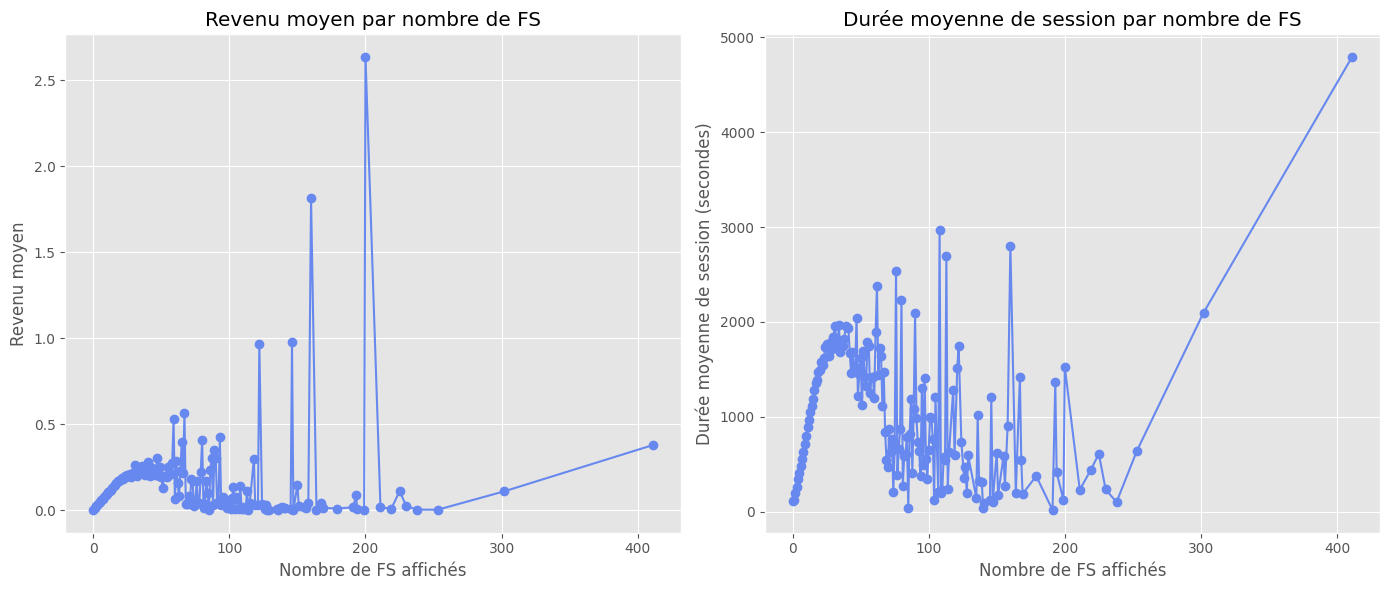

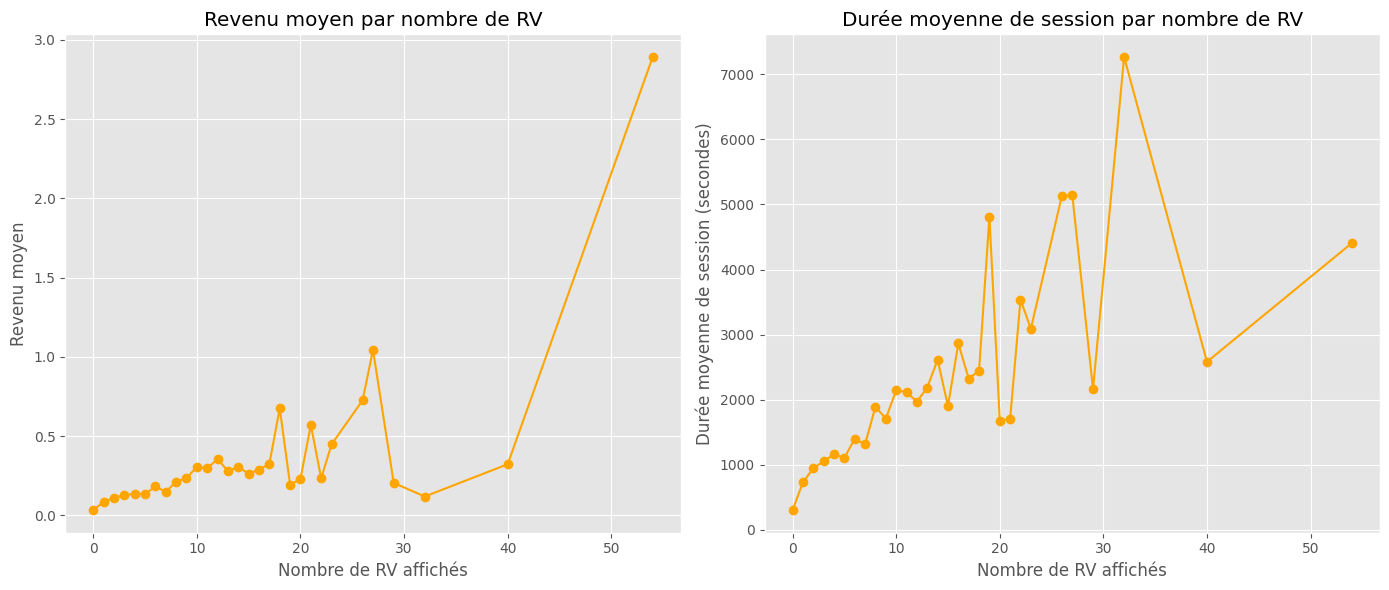

In [56]:
# Calcul des moyennes de revenu et de durée de session par nombre de FS et RV
fs_stats = new_df.groupby('fs_shown').agg({'publisher_revenue': 'mean', 'session_length': 'mean'}).reset_index()
rv_stats = new_df.groupby('rv_shown').agg({'publisher_revenue': 'mean', 'session_length': 'mean'}).reset_index()

# Visualisation des moyennes de revenu et de durée de session par FS
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fs_stats['fs_shown'], fs_stats['publisher_revenue'], marker='o')
plt.title('Revenu moyen par nombre de FS')
plt.xlabel('Nombre de FS affichés')
plt.ylabel('Revenu moyen')

plt.subplot(1, 2, 2)
plt.plot(fs_stats['fs_shown'], fs_stats['session_length'], marker='o')
plt.title('Durée moyenne de session par nombre de FS')
plt.xlabel('Nombre de FS affichés')
plt.ylabel('Durée moyenne de session (secondes)')

plt.tight_layout()
plt.show()

# Visualisation des moyennes de revenu et de durée de session par RV
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(rv_stats['rv_shown'], rv_stats['publisher_revenue'], marker='o', color='orange')
plt.title('Revenu moyen par nombre de RV')
plt.xlabel('Nombre de RV affichés')
plt.ylabel('Revenu moyen')

plt.subplot(1, 2, 2)
plt.plot(rv_stats['rv_shown'], rv_stats['session_length'], marker='o', color='orange')
plt.title('Durée moyenne de session par nombre de RV')
plt.xlabel('Nombre de RV affichés')
plt.ylabel('Durée moyenne de session (secondes)')

plt.tight_layout()
plt.show()

### Interprétation

Revenu moyen par FS : Le graphique montre une augmentation initiale du revenu moyen à mesure que le nombre de FS augmente, mais cette relation se stabilise et devient plus volatile avec des pics et des baisses imprévisibles après un certain point.

Durée moyenne de session par FS : On observe une tendance similaire pour la durée des sessions, avec une augmentation initiale suivie de variations. Cela suggère qu’un nombre modéré de FS pourrait être optimal pour prolonger la durée de session, mais au-delà de certains niveaux, les résultats deviennent moins prévisibles.

Revenu moyen par RV : Le graphique montre que le revenu moyen augmente de façon plus régulière avec le nombre de RV, ce qui suggère que les RV ont un impact positif direct et continu sur le revenu.

Durée moyenne de session par RV : De même, la durée de session augmente en corrélation avec le nombre de RV, mais des valeurs extrêmes de RV montrent des augmentations importantes, ce qui pourrait suggérer des comportements de joueurs spécifiques ou des anomalies.

Les FS et les RV influencent tous les deux le revenu moyen et la durée des sessions, mais l'impact des RV semble être plus stable et prévisible comparé aux FS.

#  Tests Statistiques pour Valider l’Impact des FS et RV

In [57]:
# Groupement des données pour chaque cohorte
session_length_groups = [new_df[new_df['ab_cohort_name'] == cohort]['session_length'] 
                         for cohort in new_df['ab_cohort_name'].unique()]

# Test de Kruskal-Wallis
kruskal_stat_length, kruskal_p_length = kruskal(*session_length_groups)
print(f"\nTest de Kruskal-Wallis - Durée de session :")
print(f"Statistique : {kruskal_stat_length}, p-value : {kruskal_p_length}")

if kruskal_p_length < 0.05:
    print("Il existe des différences significatives entre les cohortes pour la durée des sessions.")
    # Test post-hoc de Dunn avec correction de Bonferroni
    dunn_results_length = sp.posthoc_dunn(new_df, val_col='session_length', group_col='ab_cohort_name', p_adjust='bonferroni')
    print("\nRésultats du test post-hoc de Dunn (valeurs p) - Durée de session :")
    print(dunn_results_length)
else:
    print("Aucune différence significative détectée entre les cohortes pour la durée des sessions.")



Test de Kruskal-Wallis - Durée de session :
Statistique : 217.31478608438337, p-value : 5.58634769061666e-45
Il existe des différences significatives entre les cohortes pour la durée des sessions.

Résultats du test post-hoc de Dunn (valeurs p) - Durée de session :
               control      gameTune         xHigh          xLow  \
control   1.000000e+00  1.512220e-01  3.780102e-01  5.610149e-06   
gameTune  1.512220e-01  1.000000e+00  1.000000e+00  3.947030e-13   
xHigh     3.780102e-01  1.000000e+00  1.000000e+00  4.350721e-12   
xLow      5.610149e-06  3.947030e-13  4.350721e-12  1.000000e+00   
xxHigh    4.050629e-03  1.000000e+00  1.000000e+00  5.844453e-17   
xxLow     5.180343e-14  4.099257e-24  9.769062e-23  8.148743e-02   

                xxHigh         xxLow  
control   4.050629e-03  5.180343e-14  
gameTune  1.000000e+00  4.099257e-24  
xHigh     1.000000e+00  9.769062e-23  
xLow      5.844453e-17  8.148743e-02  
xxHigh    1.000000e+00  3.217321e-29  
xxLow     3.217321e-29


Test de Kruskal-Wallis - session_length :
Statistique : 209.06400082679346, p-value : 3.264251946847163e-43
Il existe des différences significatives entre les cohortes pour session_length.


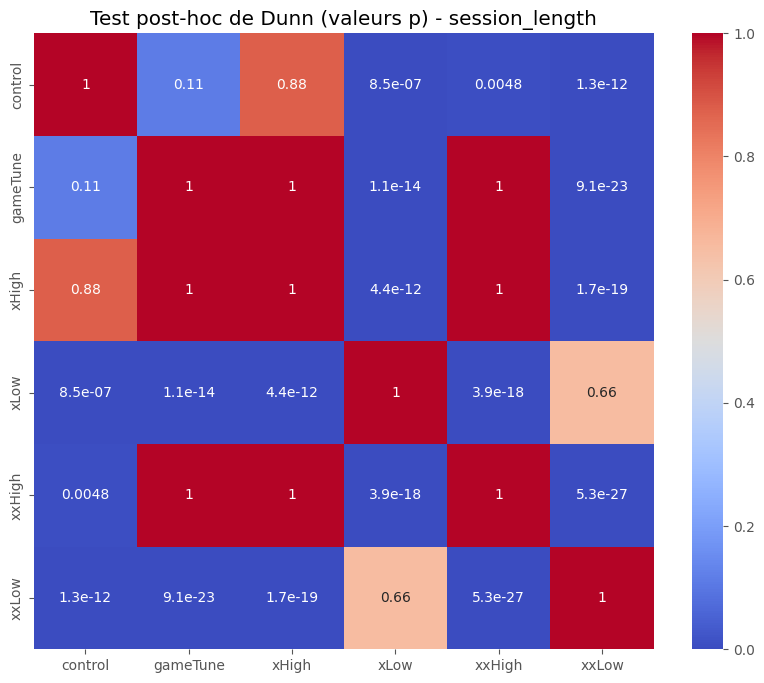


Test de Kruskal-Wallis - publisher_revenue :
Statistique : 625.2967988606425, p-value : 6.91123115904434e-133
Il existe des différences significatives entre les cohortes pour publisher_revenue.


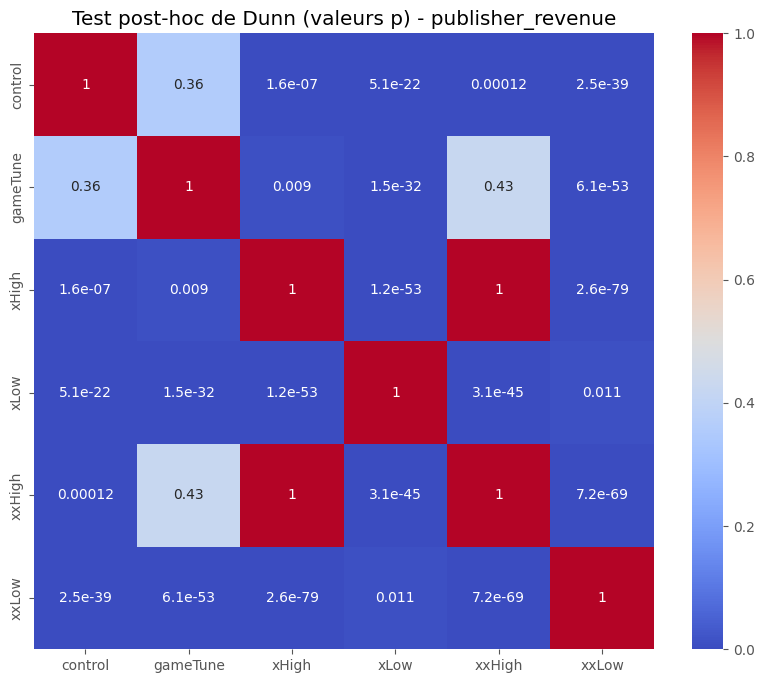


Test de Kruskal-Wallis - session_number_ :
Statistique : 66.49642055516821, p-value : 5.482061491938894e-13
Il existe des différences significatives entre les cohortes pour session_number_.


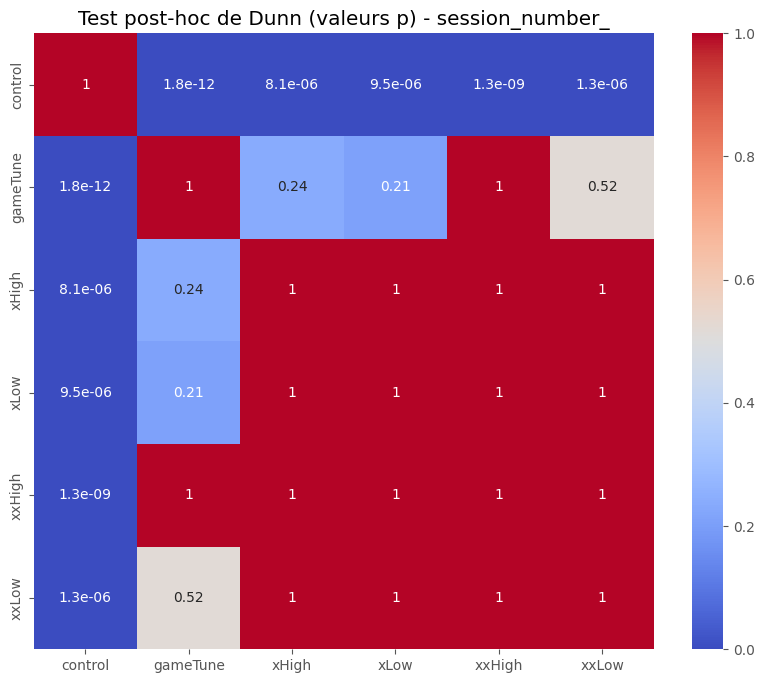

In [60]:
# Filtrer les valeurs aberrantes de la durée de session entre 10 et 10000 secondes
filtered_df = new_df[(new_df['session_length'] >= 10) & (new_df['session_length'] <= 10000)]

# Fonction pour effectuer les tests de Kruskal-Wallis et Dunn
def perform_statistical_tests(df, metric, group_col):
    # Groupement des données en fonction des cohortes pour la métrique spécifiée
    metric_groups = [df[df[group_col] == cohort][metric] for cohort in df[group_col].unique()]

    # Test de Kruskal-Wallis pour la métrique
    kruskal_stat, kruskal_p = stats.kruskal(*metric_groups)
    print(f"\nTest de Kruskal-Wallis - {metric} :")
    print(f"Statistique : {kruskal_stat}, p-value : {kruskal_p}")

    if kruskal_p < 0.05:
        print(f"Il existe des différences significatives entre les cohortes pour {metric}.")
        # Test post-hoc de Dunn avec correction de Bonferroni
        dunn_results = sp.posthoc_dunn(df, val_col=metric, group_col=group_col, p_adjust='bonferroni')
        # Affichage du tableau des résultats
        plt.figure(figsize=(10, 8))
        sns.heatmap(dunn_results, annot=True, cmap='coolwarm', cbar=True)
        plt.title(f'Test post-hoc de Dunn (valeurs p) - {metric}')
        plt.show()
    else:
        print(f"Aucune différence significative détectée entre les cohortes pour {metric}.")

# 1. Test statistique pour la durée de session
perform_statistical_tests(filtered_df, 'session_length', 'ab_cohort_name')

# 2. Test statistique pour le revenu par session
perform_statistical_tests(filtered_df, 'publisher_revenue', 'ab_cohort_name')

# 3. Test statistique pour le nombre de sessions
perform_statistical_tests(filtered_df, 'session_number_', 'ab_cohort_name')


Les résultats indiquent des différences significatives entre les cohortes en termes de durée de session, comme le confirme la p-value extrêmement faible, attestant de la validité statistique de ces différences.

Il semble y avoir une fréquence optimale pour les événements publicitaires en plein écran (FS) et les vidéos récompensées (RV). L’analyse révèle que l’augmentation du nombre de ces événements au-delà de certains seuils continue de faire croître les revenus moyens par session ainsi que la durée des sessions, mais seulement jusqu’à un point précis. Au-delà de ce point, les gains deviennent marginaux, voire négatifs.

Les comparaisons statistiques montrent que certaines cohortes (notamment "control" par rapport à "xLow", "xxHigh", et "xxLow") affichent des différences significatives en termes de durée de session. Cela suggère que le traitement ou l’exposition à des quantités variables de FS ou RV a un effet mesurable sur la durée des sessions.

Les tests statistiques et les visualisations indiquent que, jusqu’à un certain nombre d’événements FS ou RV, les utilisateurs restent engagés, ce qui augmente les revenus. Cependant, au-delà de ces seuils, une saturation se manifeste : les utilisateurs deviennent moins réceptifs ou même frustrés, diminuant ainsi l’efficacité de ces événements. Cela met en lumière l’importance de calibrer le nombre d’événements à des niveaux optimaux afin de maximiser à la fois l’engagement et les revenus, tout en évitant de compromettre l’expérience utilisateur.

En résumé, l’augmentation du nombre de ces événements au-delà de certains seuils continue d’influencer positivement les revenus moyens et la durée de session, mais les bénéfices finissent par diminuer après un certain point, rendant l’optimisation indispensable.

# 4 - Quelles seraient vos recommandations pour le product manager de ce jeu vidéo ?

Voici mes recommandations pour le **Product Manager** afin d'optimiser les performances du jeu vidéo en se basant sur les données analysées :

### 1. **Optimiser la Fréquence des Publicités FS (Full Screen) et RV (Rewarded Videos)**:
   - **Limiter le nombre de publicités FS et RV** : D'après les analyses, il existe un seuil optimal au-delà duquel l'affichage de publicités ne génère plus de revenu supplémentaire et peut même réduire l'engagement des joueurs. Il est donc crucial d’identifier ce seuil précis (par exemple, 10-20 FS ou RV) et de limiter le nombre d’affichages pour ne pas saturer les utilisateurs.
   - **Tester différentes configurations** : Mener d’autres tests A/B pour expérimenter différentes fréquences de FS et RV afin d’affiner les valeurs optimales identifiées. Cela permettra de confirmer le nombre optimal d’affichages pour maximiser l’engagement et les revenus tout en minimisant les effets de saturation.

### 2. **Personnaliser l’Expérience Utilisateur en Fonction de la Cohorte**:
   - **Adapter les publicités selon les segments** : Comme les tests de Kruskal-Wallis et Dunn ont montré des différences significatives entre les cohortes, il est important de personnaliser les fréquences de publicités pour chaque cohorte d’utilisateurs. Par exemple, les joueurs dans la cohorte "xxHigh" peuvent tolérer plus de publicités que ceux de la cohorte "xLow". Adapter les stratégies en fonction de la tolérance de chaque segment peut maximiser les revenus tout en réduisant le risque de désengagement.
   - **Suivre l’évolution des performances par segment** : Mettre en place un suivi continu des performances par cohorte afin d’ajuster les interventions en fonction des retours en temps réel.

### 3. **Améliorer l’Engagement en Augmentant la Durée des Sessions**:
   - **Introduire des récompenses liées aux RV** : L’analyse montre que les RV (publicités vidéo récompensées) ont un impact positif sur la durée de session et le revenu. Il serait judicieux d’introduire des récompenses plus attractives ou des bonus pour encourager les joueurs à visionner ces vidéos tout en jouant plus longtemps.
   - **Rééquilibrer les temps de pause** : Ajuster les intervalles entre les événements publicitaires pour maximiser l’engagement sans interrompre l’expérience de jeu de manière trop intrusive. L’objectif est de garder les sessions suffisamment longues sans sacrifier l’expérience utilisateur.

### 4. **Suivi et Filtrage des Valeurs Abérantes**:
   - **Mettre en place des filtres automatiques** pour détecter les sessions dont la durée ou les revenus sont anormalement bas ou élevés (comme les sessions de moins de 10 secondes ou de plus de 10 000 secondes). Cela permettra d’éliminer les anomalies qui pourraient fausser les analyses futures.
   - **Effectuer des vérifications régulières** pour s’assurer que les données sont cohérentes et reflètent l’expérience utilisateur réelle, en ajustant les modèles de prédiction et les tests en conséquence.

### 5. **Expérimentation Continue et Tests A/B**:
   - **Conduire des tests A/B en continu** pour affiner les fréquences de publicités et les types de récompenses. Tester de nouvelles idées comme des mini-jeux publicitaires ou des publicités interactives pour évaluer l’impact sur l’engagement et les revenus.
   - **Analyser l’impact de chaque intervention** en utilisant les statistiques pour confirmer ou infirmer les hypothèses, et ajuster les stratégies de monétisation en fonction des résultats.

### 6. **Optimisation Continue des Revenus par Session**:
   - **Miser sur une stratégie équilibrée** : Bien que l’ajout de publicités génère des revenus, il est crucial de ne pas négliger l’expérience utilisateur. Un équilibre doit être trouvé entre maximiser les revenus et maintenir un niveau élevé de satisfaction et d’engagement des joueurs.
   - **Évaluer les performances des événements publicitaires** pour s’assurer qu’ils ne causent pas de désengagement prématuré des joueurs. 

En appliquant ces recommandations, le Product Manager pourra maximiser à la fois l’engagement des joueurs et les revenus générés par les publicités tout en minimisant le risque de saturation ou de frustration des utilisateurs.

# 5 - Est ce que vous avez des suggestions pour de futures expérimentations ?

Voici quelques suggestions pour de futures expérimentations qui pourraient aider à affiner la stratégie de monétisation et d’engagement des utilisateurs tout en maximisant les revenus et l’expérience utilisateur :

### 1. **Tester des Intervalles Variables pour les Publicités FS et RV**
   - **Objectif** : Déterminer si l’utilisation d’intervalles variables pour les publicités FS et RV (au lieu d’un intervalle fixe) influence l’engagement des utilisateurs.
   - **Expérimentation** : Tester différentes stratégies comme :
     - Intervalles basés sur les actions de l’utilisateur (par exemple, après avoir terminé un niveau ou atteint un certain score).
     - Intervalles adaptatifs basés sur le comportement de l’utilisateur (par exemple, plus l’utilisateur joue, plus les publicités apparaissent de manière espacée).
   - **Hypothèse** : Les intervalles adaptatifs ou liés aux actions peuvent améliorer l'expérience utilisateur et prolonger les sessions tout en maximisant l'exposition publicitaire.

### 2. **Expérimentation sur le Format des Publicités**
   - **Objectif** : Évaluer l’impact de différents formats de publicités (interactives, vidéo, bannières, etc.) sur les revenus et la rétention des utilisateurs.
   - **Expérimentation** : Comparer l’effet des publicités interactives (qui demandent une participation active de l’utilisateur) par rapport aux publicités vidéo classiques et aux bannières statiques.
   - **Hypothèse** : Les formats interactifs pourraient capter davantage l’attention des joueurs et rendre l’expérience publicitaire moins intrusive, augmentant ainsi les revenus sans nuire à l’engagement.

### 3. **Optimisation des Récompenses Associées aux RV (Rewarded Videos)**
   - **Objectif** : Identifier le type de récompense le plus incitatif pour les utilisateurs afin d’optimiser la visualisation de RV.
   - **Expérimentation** : Proposer différentes récompenses (par exemple, monnaie virtuelle, bonus de progression, objets rares) et mesurer leur impact sur le taux de visionnage des RV.
   - **Hypothèse** : Certains types de récompenses pourraient être plus efficaces pour inciter les utilisateurs à visionner les vidéos, augmentant ainsi les revenus sans réduire l’expérience de jeu.

### 4. **Tests A/B sur l'Expérience Utilisateur Basée sur le Profil de l'Utilisateur**
   - **Objectif** : Personnaliser l’expérience utilisateur en fonction des caractéristiques de chaque profil (nouveaux utilisateurs vs utilisateurs actifs, joueurs occasionnels vs joueurs réguliers).
   - **Expérimentation** : Segmenter les utilisateurs en groupes basés sur leur comportement ou profil (nouveaux joueurs, utilisateurs récurrents, joueurs dépensiers, etc.) et adapter la fréquence des publicités, le type de contenu offert, et les récompenses.
   - **Hypothèse** : La personnalisation de l’expérience utilisateur en fonction du profil pourrait augmenter l’engagement et la rétention, en offrant une expérience mieux adaptée aux attentes de chaque groupe.

### 5. **Évaluer l'Impact des Mini-Jeux Publicitaires et des Contenus Exclusifs**
   - **Objectif** : Tester l’intégration de mini-jeux publicitaires ou de contenus exclusifs comme alternative aux publicités traditionnelles.
   - **Expérimentation** : Proposer des mini-jeux liés à des marques ou des événements spécifiques en guise de pause publicitaire, et mesurer l’impact sur la durée des sessions et les revenus générés.
   - **Hypothèse** : Les mini-jeux publicitaires pourraient rendre l’expérience plus ludique, augmentant ainsi la durée des sessions et le taux de rétention des joueurs tout en intégrant une forme de monétisation non intrusive.

### 6. **Expérimentation sur les Fréquences d'Offres Promotionnelles In-Game**
   - **Objectif** : Analyser si la fréquence des offres promotionnelles (packs spéciaux, réductions temporaires) a un effet sur les revenus générés par les achats in-game.
   - **Expérimentation** : Tester différentes fréquences d’apparition de ces offres promotionnelles (par exemple, toutes les 3 sessions, ou après une victoire importante) et évaluer leur impact sur le taux de conversion des achats in-game.
   - **Hypothèse** : Une fréquence optimisée des promotions pourrait stimuler les achats sans donner une impression de "vente agressive" qui pourrait désengager les utilisateurs.

### 7. **Mise en Place d’Un Programme de Fidélité Basé sur les Actions In-Game**
   - **Objectif** : Tester l’impact d’un programme de fidélité (points ou badges) pour récompenser les utilisateurs actifs et les inciter à rester plus longtemps.
   - **Expérimentation** : Développer un programme de points ou de récompenses pour les actions in-game (visionnage de publicités, achat d’items, victoires en jeu) et mesurer son effet sur la rétention et l’engagement des joueurs.
   - **Hypothèse** : Un programme de fidélité pourrait encourager les utilisateurs à interagir plus souvent avec le jeu, augmentant à la fois la durée des sessions et le taux de rétention.

### 8. **Étudier l'Impact des Ajustements d'Interface sur l'Engagement**
   - **Objectif** : Tester différentes interfaces utilisateurs (UI) pour voir si un changement visuel ou ergonomique peut améliorer l’expérience et l’engagement.
   - **Expérimentation** : Mener des tests A/B en modifiant la position des éléments de l’interface (par exemple, emplacement des boutons de publicités, tailles des récompenses visibles) et mesurer leur impact sur la durée des sessions.
   - **Hypothèse** : Une interface plus ergonomique ou qui rend les récompenses plus visibles pourrait stimuler l’engagement des utilisateurs, allongeant ainsi les sessions et augmentant la rétention.